In [62]:
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()

In [63]:
#Ersteinmal ein Einblick über den Datensatz mittels Panda und der head() Funktion
import pandas as pd 

data_features = pd.DataFrame(data = data.data, 
                       columns = data.feature_names) 
data_targets = data.target
print(data_features.shape)
print(data_targets.shape)
print(data_features.head().T)
print(data_targets[0:5])


(569, 30)
(569,)
                                   0            1            2           3  \
mean radius                17.990000    20.570000    19.690000   11.420000   
mean texture               10.380000    17.770000    21.250000   20.380000   
mean perimeter            122.800000   132.900000   130.000000   77.580000   
mean area                1001.000000  1326.000000  1203.000000  386.100000   
mean smoothness             0.118400     0.084740     0.109600    0.142500   
mean compactness            0.277600     0.078640     0.159900    0.283900   
mean concavity              0.300100     0.086900     0.197400    0.241400   
mean concave points         0.147100     0.070170     0.127900    0.105200   
mean symmetry               0.241900     0.181200     0.206900    0.259700   
mean fractal dimension      0.078710     0.056670     0.059990    0.097440   
radius error                1.095000     0.543500     0.745600    0.495600   
texture error               0.905300     0.7339

In [124]:
import math
#Es gibt also 569 Einträger für 30 Columns, nun zur Frage welche Columns es gibt:
column_names = data_features.columns.tolist()
print("Column names:", column_names)
#Auch die Frage was unser Target bedeutet:
print(data.target_names)
print(data_features.iloc[0, 1])
#einen dataframe mit allem
data_set= pd.DataFrame(data_features)

data_set['Diagnose']=data.target

print(data_features.iloc[505,14])
print(data_features[column_names[14]].mean())

    
print(math.sqrt(data_features[column_names[14]].var()))

Column names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
['malignant' 'benign']
10.38
0.02177
0.007040978910369069
0.003002517943839067


In [132]:
import math

#Ersteinmal die Frage ob die Daten einheitliche Datentypen haben:
type_aenderungen=[]
for j in range(data_features.shape[1]): 
    my_type = type(data_features.iloc[0, j])
    for i in range(data_features.shape[0]):
 
        if type(data_features.iloc[i, j])== my_type:
            continue
        else:
            type_aenderungen.append([i,j])
            
if (len(type_aenderungen)>0):
    for entry in type_aenderungen:
        print("Type Aenderung bei:" +entry)
else:
    print("Es gibt keine Type Aenderungen")
#Nun gilt es zu überprüfen ob es leere Datensätze bzw. ob Daten fehlen oder ob es unsinnige Einträge gibt:
falsche_eintraege=[]
for j in range(data_features.shape[1]): 
    for i in range(data_features.shape[0]):
        if data_features.iloc[i, j]<= 0:
            #Da bei Concavity und allen diesen begriff enthalteten 0 erlaubt ist,  müssen diese für 0 ausgenommen werden
            if j!=26 and j!=27 and j!=6 and j!=7 and j!=16 and j!=17:
                falsche_eintraege.append([i,j])
if (len(falsche_eintraege)>0):
    for entry in falsche_eintraege:
        print(entry[0])
        print("Falscher eintrag bei: (" +str(entry[0])+","+str(entry[1])+")")
else:
    print("Es gibt keine falschen Einträge")
#testen ob es ausreißer außerhalb der 3-sigma entfernung gibt:
ausreiser=[]
for j in range(data_features.shape[1]): 

    mean = data_features[column_names[j]].mean()
    sigma = math.sqrt(data_features[column_names[j]].var())
    for i in range(data_features.shape[0]):
        if (data_features.iloc[i, j] < mean- 3*sigma or data_features.iloc[i,j]>mean +3*sigma) :
            ausreiser.append([i,j])
if (len(ausreiser)>0):
    ausreiser_count=[]
    for entry in ausreiser:
        if entry[0] not in ausreiser_count:
            ausreiser_count.append(entry[0])
        print("Ausreißer bei: (" +str(entry[0])+","+str(entry[1])+")")
    print("Anzahl an Ausreißern:",len(ausreiser_count))
else:
    print("Es gibt keine Ausreißer")
    

Es gibt keine Type Aenderungen
Es gibt keine falschen Einträge
Ausreißer bei: (82,0)
Ausreißer bei: (180,0)
Ausreißer bei: (212,0)
Ausreißer bei: (352,0)
Ausreißer bei: (461,0)
Ausreißer bei: (219,1)
Ausreißer bei: (232,1)
Ausreißer bei: (239,1)
Ausreißer bei: (259,1)
Ausreißer bei: (82,2)
Ausreißer bei: (122,2)
Ausreißer bei: (180,2)
Ausreißer bei: (212,2)
Ausreißer bei: (352,2)
Ausreißer bei: (461,2)
Ausreißer bei: (521,2)
Ausreißer bei: (82,3)
Ausreißer bei: (122,3)
Ausreißer bei: (180,3)
Ausreißer bei: (212,3)
Ausreißer bei: (339,3)
Ausreißer bei: (352,3)
Ausreißer bei: (461,3)
Ausreißer bei: (521,3)
Ausreißer bei: (3,4)
Ausreißer bei: (105,4)
Ausreißer bei: (122,4)
Ausreißer bei: (504,4)
Ausreißer bei: (568,4)
Ausreißer bei: (0,5)
Ausreißer bei: (3,5)
Ausreißer bei: (78,5)
Ausreißer bei: (82,5)
Ausreißer bei: (108,5)
Ausreißer bei: (122,5)
Ausreißer bei: (181,5)
Ausreißer bei: (258,5)
Ausreißer bei: (567,5)
Ausreißer bei: (78,6)
Ausreißer bei: (82,6)
Ausreißer bei: (108,6)
Ausreiß

In [ ]:
#Nun gilt es die Ausreißer zu entfernen 
'''
for entry in ausreiser_count:
    data_features.drop(index=entry, inplace=True)
'''

Text(0, 0.5, 'mean compactness ')

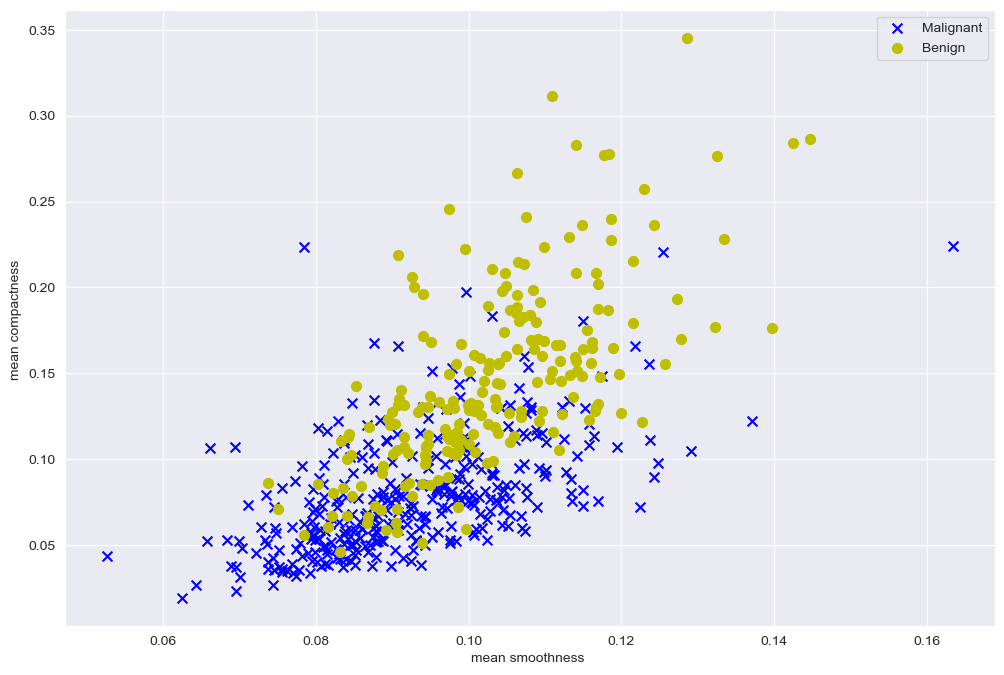

In [66]:
import matplotlib.pyplot as plt
#seperiere die Daten nach Diagnose
data_set_malign = data_set[data_set['Diagnose']==1]
data_set_benign = data_set[data_set['Diagnose']==0]

#50 randomisierte Werte je nach Diagnose getrennt von 2 Indikatoren in einer 2-D Anschauung


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data_set_malign['mean smoothness'], data_set_malign['mean compactness'], s=50, c='b', marker='x', label='Malignant')
ax.scatter(data_set_benign['mean smoothness'], data_set_benign['mean compactness'], s=50, c='y', marker='o', label='Benign')
ax.legend()
ax.set_xlabel('mean smoothness ')
ax.set_ylabel('mean compactness ')

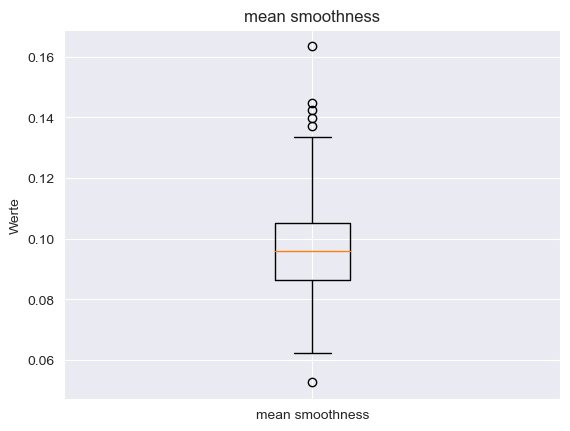

In [136]:
import matplotlib.pyplot as plt
#Mit dem neuen Verstädnis über unseren Datensatz gilt es nun dies zu visualisieren, um etwaige Ausreißer zu identifizieren
#for i in range(data_features.shape[1]):
i=4
# Boxplot erstellen
plt.boxplot([data_features[column_names[i]]], labels=[column_names[i]])
plt.title(column_names[i])
plt.ylabel('Werte')
plt.show()

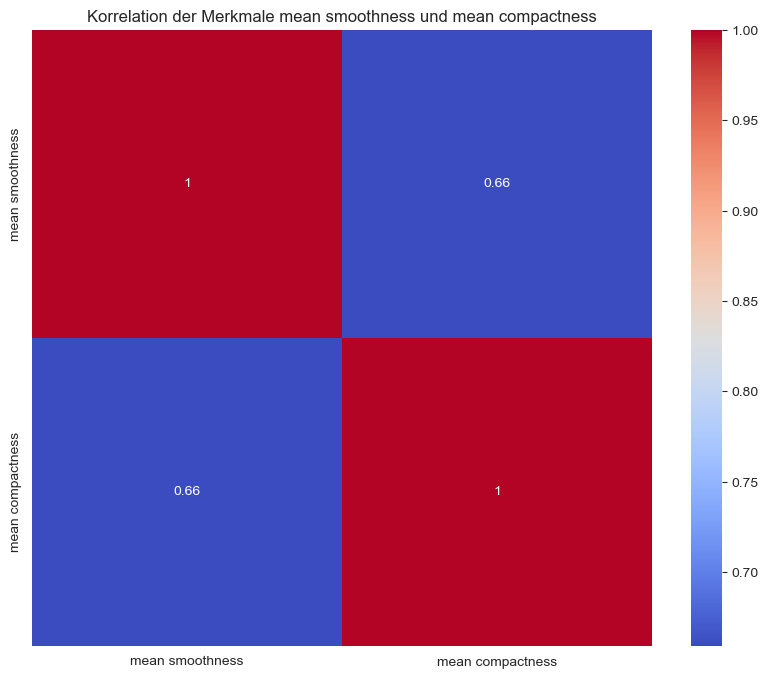

In [91]:
import seaborn as sns
# Korrelationen mit einer Heatmap visualisiert
plt.figure(figsize=(10, 8))
sns.heatmap(data_features[[column_names[4], column_names[5]]].corr(), annot=True, cmap="coolwarm")
plt.title("Korrelation der Merkmale " +column_names[4] +" und "+  column_names[5] )
plt.show()

Accuracy: 0.9708
Precision: 0.9725
AUC (Area Under the Curve): 0.9966


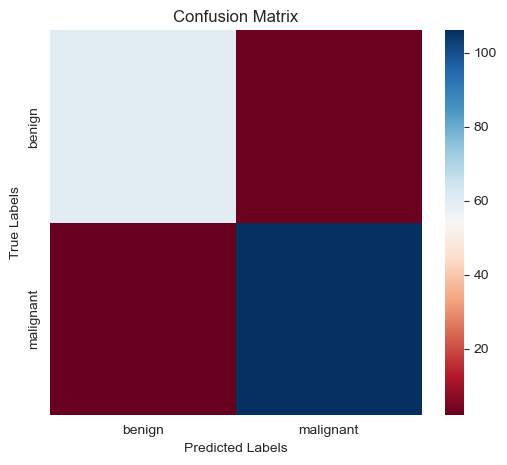

In [69]:
from sklearn.metrics import precision_score, roc_auc_score
#Random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix
import seaborn as sns

X = data_features[[column_names[i] for i in range(0, 30)]]

y=data_targets
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modellinitialisierung
model_forest =RandomForestClassifier(n_estimators=500, random_state=12)

# Modelltraining
model_forest.fit(X_train, y_train)

# Vorhersagen
y_pred = model_forest.predict(X_test)


# Bewertung des Modells
accuracy_forest = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_forest:.4f}")

precision_forest = precision_score(y_test, y_pred)
print(f"Precision: {precision_forest:.4f}")
roc_auc = roc_auc_score(y_test, model_forest.predict_proba(X_test)[:, 1])
print(f"AUC (Area Under the Curve): {roc_auc:.4f}")
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="RdBu", xticklabels=["benign", "malignant"],  yticklabels=["benign", "malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Beste n_estimators: {'n_estimators': 200}
Beste Genauigkeit: 0.949620253164557


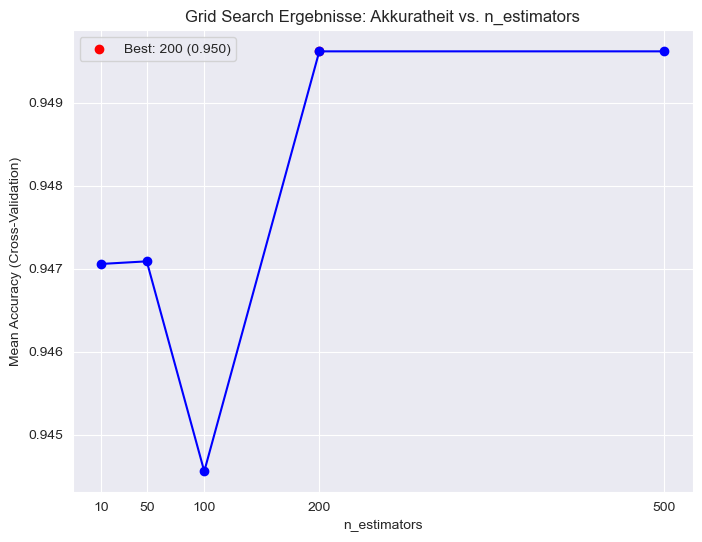

In [138]:
#gridsearch
from sklearn.model_selection import GridSearchCV

# Parameter Grid für n_estimators
param_grid = {'n_estimators': [10, 50, 100, 200, 500]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Beste Parameter und Leistung
print(f"Beste n_estimators: {grid_search.best_params_}")
print(f"Beste Genauigkeit: {grid_search.best_score_}")

results = grid_search.cv_results_
param_values = param_grid['n_estimators']
mean_scores = results['mean_test_score']

# Plot erstellen
plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_scores, marker='o', linestyle='-', color='blue')
plt.title('Grid Search Ergebnisse: Akkuratheit vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Accuracy (Cross-Validation)')
plt.xticks(param_values)
plt.grid(True)

# Markieren des besten Werts
best_param = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_
plt.scatter(best_param, best_score, color='red', label=f'Best: {best_param} ({best_score:.3f})')
plt.legend()

plt.show()

Accuracy: 0.9649
Precision: 0.9550


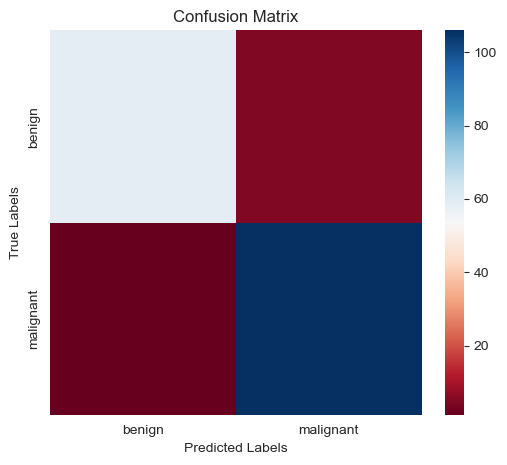

In [146]:

import numpy as np
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix

X = data_features[[column_names[i] for i in range(0, 30)]]

y=data_targets
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='poly', C=10000, random_state=122)

# Fit the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)


# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm:.4f}")

precision_svm = precision_score(y_test, y_pred)
print(f"Precision: {precision_svm:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="RdBu", xticklabels=["benign", "malignant"],  yticklabels=["benign", "malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Beste C: {'C': 10000}
Beste Genauigkeit: 0.9471428571428571


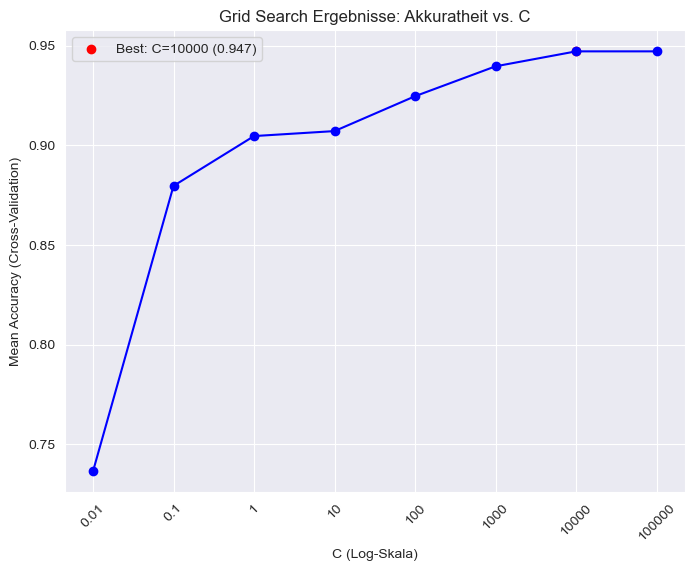

In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Parameter Grid für C
param_grid = {'C': [.01,0.1, 1, 10, 100, 1000, 10000, 100000]}
svm_model = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=50)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
grid_search.fit(X_train, y_train)

# Beste Parameter und Leistung
print(f"Beste C: {grid_search.best_params_}")
print(f"Beste Genauigkeit: {grid_search.best_score_}")

results = grid_search.cv_results_
param_values = param_grid['C']
mean_scores = results['mean_test_score']

# Plot erstellen
plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_scores, marker='o', linestyle='-', color='blue')
plt.title('Grid Search Ergebnisse: Akkuratheit vs. C')
plt.xscale('log')  
plt.xlabel('C (Log-Skala)')
plt.ylabel('Mean Accuracy (Cross-Validation)')
plt.xticks(param_values, labels=[str(c) for c in param_values], rotation=45)
plt.grid(True)

# Markieren des besten Werts
best_param = grid_search.best_params_['C']
best_score = grid_search.best_score_
plt.scatter(best_param, best_score, color='red', label=f'Best: C={best_param} ({best_score:.3f})')
plt.legend()

plt.show()

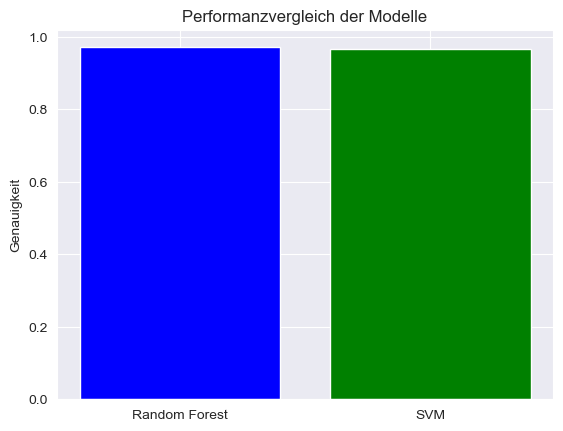

In [80]:
#Visualisierung der Genauigkeiten:
plt.bar(['Random Forest', 'SVM'], [accuracy_forest, accuracy_svm], color=['blue', 'green'])
plt.ylabel("Genauigkeit")
plt.title("Performanzvergleich der Modelle")
plt.show()

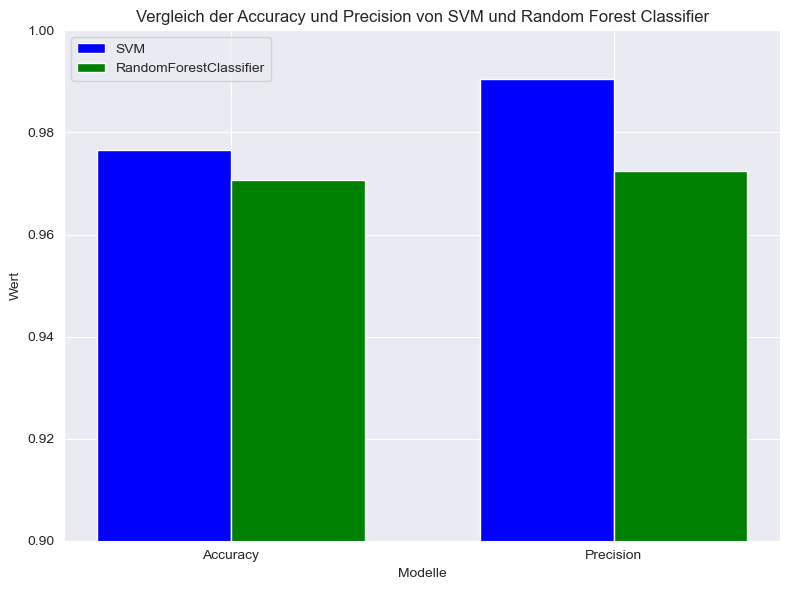

In [86]:
# Visualisierung: Balkendiagramm für Accuracy und Precision
labels = ['Accuracy', 'Precision']
forest_scores = [accuracy_forest, precision_forest]
svm_scores = [accuracy_svm, precision_svm]

x = range(len(labels))  # Positionen auf der x-Achse

# Erstelle das Diagramm
fig, ax = plt.subplots(figsize=(8, 6))
# Balken für Accuracy und Precision nebeneinander
bar_width = 0.35  # Breite der Balken
ax.bar(x, svm_scores, width=bar_width, label='SVM', align='center', color='b')
ax.bar([p + bar_width for p in x], forest_scores, width=bar_width, label='RandomForestClassifier', align='center', color='g')


# Achsenbeschriftungen und Titel
ax.set_xlabel('Modelle')
ax.set_ylabel('Wert')
ax.set_title('Vergleich der Accuracy und Precision von SVM und Random Forest Classifier')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()
# Setze den Bereich der y-Achse ab 0.9
ax.set_ylim(0.9, 1.0)

# Zeige das Diagramm
plt.tight_layout()
plt.show()